In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
from load_data import load_data
df = load_data()

In [3]:
from precomputed import category_performance, month_performance, region_performance, discount_Analysis, top_ten_products, age_group_performance

In [4]:
category_performence = category_performance(df)
month_performence = month_performance(df)
region_performence = region_performance(df)
age_group_performence = age_group_performance(df)
discount_analysis = discount_Analysis(df)
top_10_products = top_ten_products(df)

C:\Users\Abdel\AppData\Local\Temp\ipykernel_6372\857621972.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products,


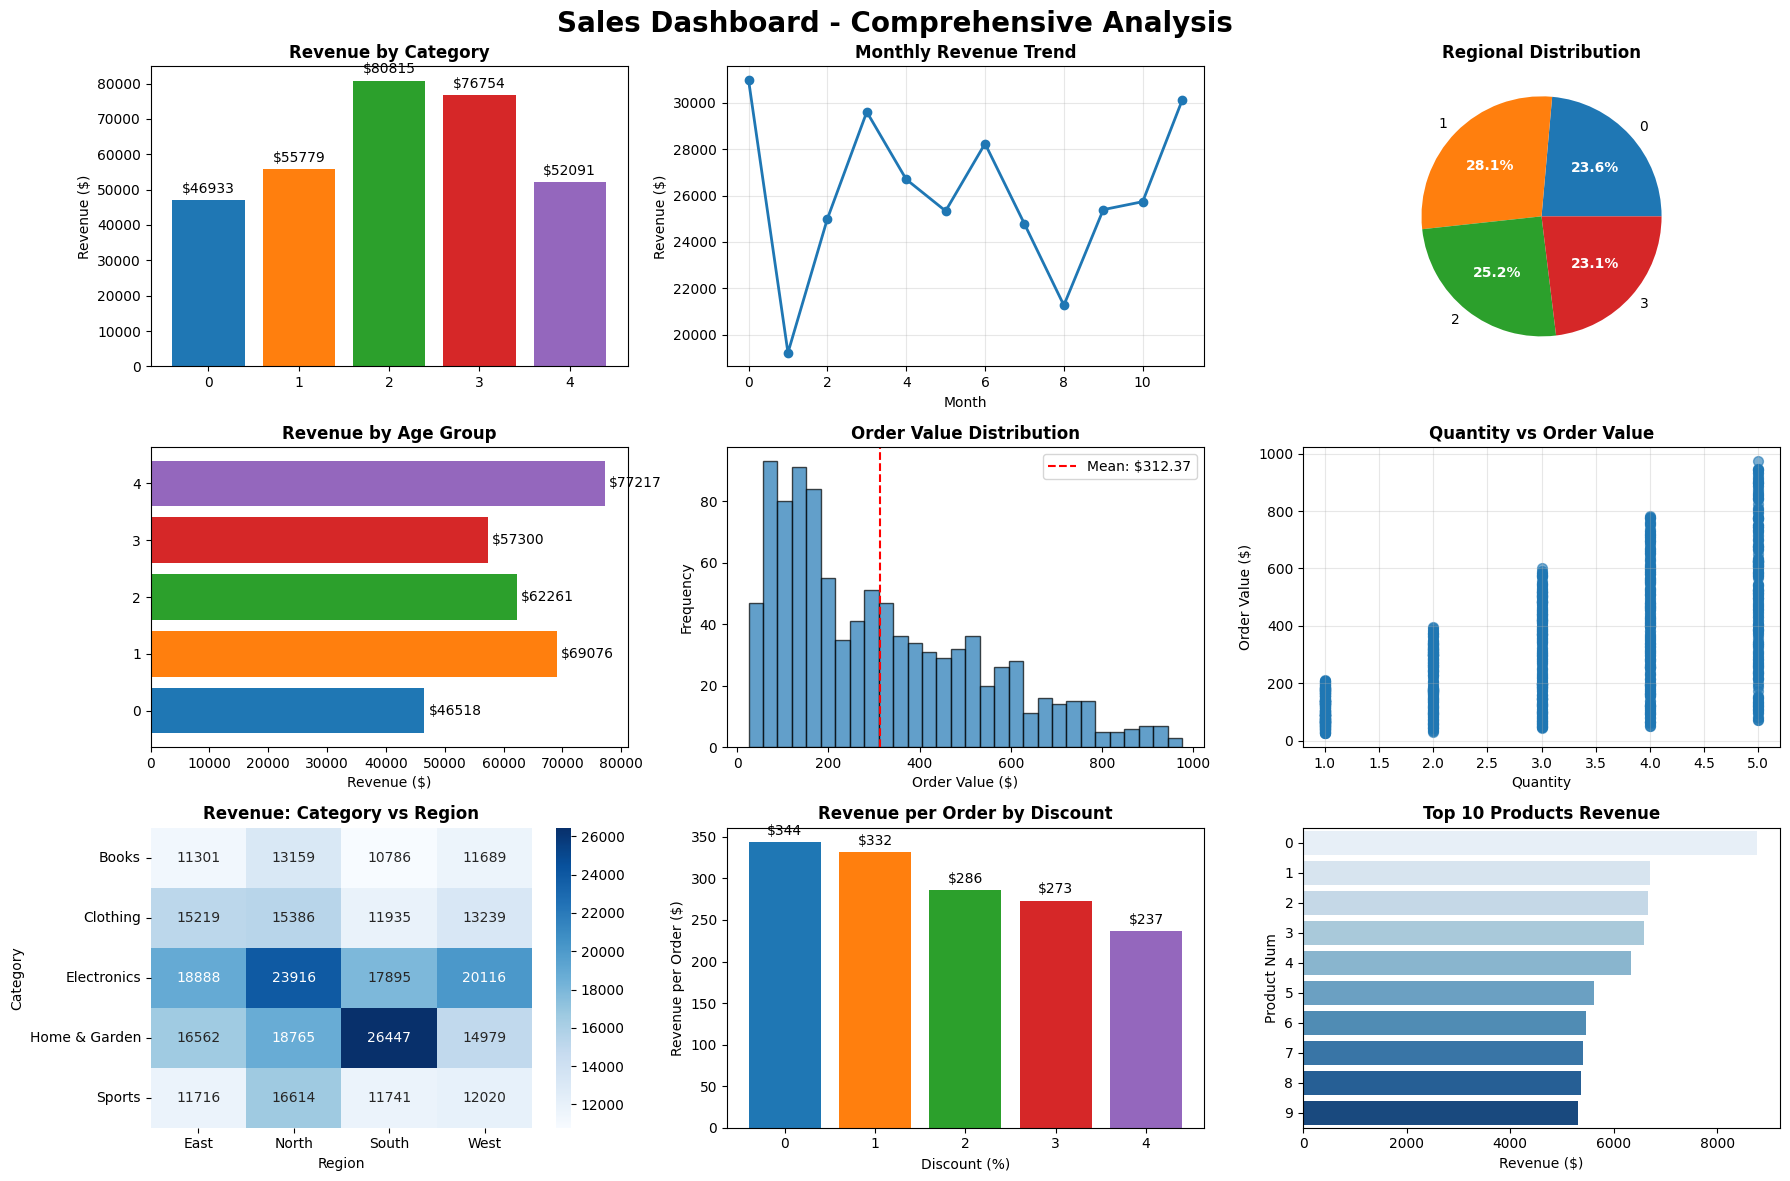

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Couleurs cohérentes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
main_color = '#1f77b4'

# Revenue by category (bar chart)
bars1 = axes[0,0].bar(category_performence.index, category_performence['total_revenue'], color=colors[:len(category_performence)])
axes[0,0].set_title('Revenue by Category', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Revenue ($)')

# Annotations
for bar in bars1:
   height = bar.get_height()
   axes[0,0].annotate(f'${height:.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Monthly trend (line plot)
axes[0,1].plot(month_performence.index, month_performence['total_revenue'],
              color=main_color, marker='o', linewidth=2, markersize=6)
axes[0,1].set_title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Revenue ($)')
axes[0,1].set_xlabel('Month')
axes[0,1].grid(True, alpha=0.3)

# Regional distribution (pie chart)
wedges, texts, autotexts = axes[0,2].pie(region_performence['total_revenue'],
                                        labels=region_performence.index,
                                        autopct='%1.1f%%', colors=colors)
axes[0,2].set_title('Regional Distribution', fontsize=12, fontweight='bold')
for autotext in autotexts:
   autotext.set_color('white')
   autotext.set_fontweight('bold')

# Age group analysis (horizontal bar)
bars4 = axes[1,0].barh(age_group_performence.index, age_group_performence['total_revenue'],
                      color=colors[:len(age_group_performence)])
axes[1,0].set_title('Revenue by Age Group', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Revenue ($)')
# Annotations
for i, bar in enumerate(bars4):
   width = bar.get_width()
   axes[1,0].annotate(f'${width:.0f}', xy=(width, bar.get_y() + bar.get_height()/2),
                     xytext=(3, 0), textcoords="offset points", ha='left', va='center')

# Order value distribution (histogram)
n, bins, patches = axes[1,1].hist(df['final_amount'], bins=30, color=main_color, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Order Value Distribution', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Order Value ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(df['final_amount'].mean(), color='red', linestyle='--',
                label=f'Mean: ${df["final_amount"].mean():.2f}')
axes[1,1].legend()

# Quantity vs price scatter plot
scatter = axes[1,2].scatter(df['quantity'], df['final_amount'],
                          color=main_color, alpha=0.6, s=50)
axes[1,2].set_title('Quantity vs Order Value', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Quantity')
axes[1,2].set_ylabel('Order Value ($)')
axes[1,2].grid(True, alpha=0.3)

# Category vs region heatmap
pivot_data = df.pivot_table(values='final_amount', index='product_category',
                          columns='customer_region', aggfunc='sum')
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='Blues', ax=axes[2,0])
axes[2,0].set_title('Revenue: Category vs Region', fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Region')
axes[2,0].set_ylabel('Category')

# Discount impact (bar chart)
bars8 = axes[2,1].bar(discount_analysis.index, discount_analysis['revenue_per_order'],
                     color=colors[:len(discount_analysis)])
axes[2,1].set_title('Revenue per Order by Discount', fontsize=12, fontweight='bold')
axes[2,1].set_xlabel('Discount (%)')
axes[2,1].set_ylabel('Revenue per Order ($)')
# Annotations
for bar in bars8:
   height = bar.get_height()
   axes[2,1].annotate(f'${height:.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Top products (horizontal bar)
sns.barplot(data=top_10_products,
           y=top_10_products.index,
           x=top_10_products['total_revenue'],
           ax=axes[2,2],
           palette='Blues',
           orient='h')
axes[2,2].set_title('Top 10 Products Revenue', fontsize=12, fontweight='bold')
axes[2,2].set_xlabel('Revenue ($)')
axes[2,2].set_ylabel('Product Num')

plt.suptitle('Sales Dashboard - Comprehensive Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig('../visuals/visual_dashboard.png', dpi=300)